# Import Thư Viện

In [58]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display


# Đọc Dữ Liệu

In [59]:
PATH  = Path.cwd() / 'Data/penguins.csv'
DATA = pd.read_csv(PATH)
DATA

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Thống kê mô tả các đặc trưng số liệu

In [60]:
DATA.describe() 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [61]:
print(DATA.columns.values)

['species' 'island' 'bill_length_mm' 'bill_depth_mm' 'flipper_length_mm'
 'body_mass_g' 'sex' 'year']


### Mô tả các thuộc tính (Penguins Dataset)

1. **bill_length_mm**: Chiều dài mỏ của chim cánh cụt (mm)
2. **bill_depth_mm**: Độ sâu mỏ của chim cánh cụt (mm)
3. **flipper_length_mm**: Chiều dài vây (cánh) của chim cánh cụt (mm)
4. **body_mass_g**: Khối lượng cơ thể của chim cánh cụt (gam)
5. **sex**: Giới tính của chim cánh cụt
6. **species**: Loài chim cánh cụt
7. **island**: Đảo sinh sống
8. **year**: Năm quan sát

**Phân loại biến**  
- **Thuộc tính phân loại (Categorical):** `species`, `island`, `sex`
- **Thuộc tính số (Numeric):** `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, `year`

# Kiểm tra dữ liệu thiếu và ngoại lai

In [62]:
print("Missing Values per Column:")
print(DATA.isnull().sum())
print("------------------------------------")
print("Infinity Values per Column:")
print((DATA == np.inf).sum() + (DATA == -np.inf).sum())

Missing Values per Column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
------------------------------------
Infinity Values per Column:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


### Nhận xét về dữ liệu thiếu và giá trị vô cực

- Một số cột số và cột giới tính (`sex`) có giá trị thiếu, nhưng tỷ lệ không lớn.
- Không có giá trị vô cực trong dữ liệu.
- Có thể xóa các dòng thiếu dữ liệu hoặc điền giá trị thay thế tùy mục đích phân tích.

In [63]:
df_clean = DATA.dropna()
df_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Trực quan hóa mối quan hệ giữa các biến số

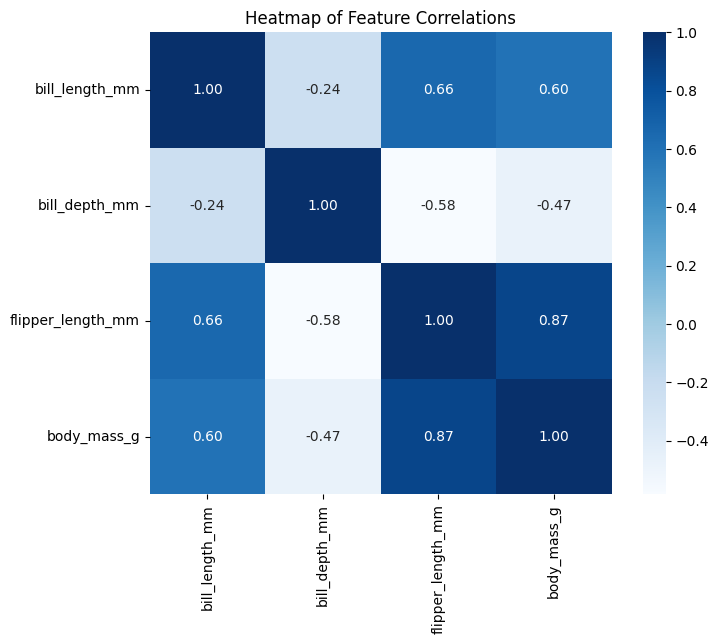

In [64]:
selected_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
corr = DATA[selected_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

## Các biến phân loại


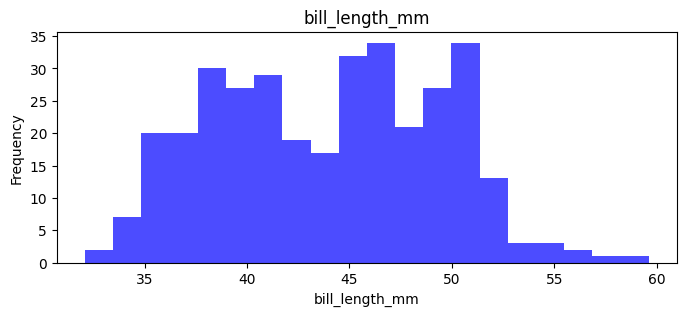

bill_length_mm: 
bill_length_mm
41.1    7
45.2    6
39.6    5
37.8    5
46.2    5
       ..
51.0    1
53.5    1
51.4    1
51.9    1
55.8    1
Name: count, Length: 164, dtype: int64


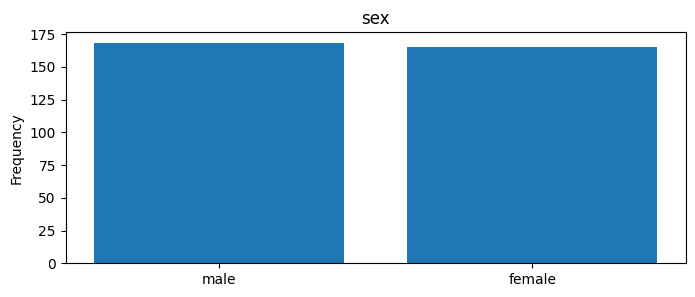

sex: 
sex
male      168
female    165
Name: count, dtype: int64


In [65]:
def histogram(variable):
    var = DATA[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(8,3))
    plt.hist(var, bins=20, color='blue', alpha=0.7)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}".format(variable, varValue))

def bar_plot(variable):
    var = DATA[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(8,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}".format(variable, varValue))

histogram('bill_length_mm')
bar_plot('sex')

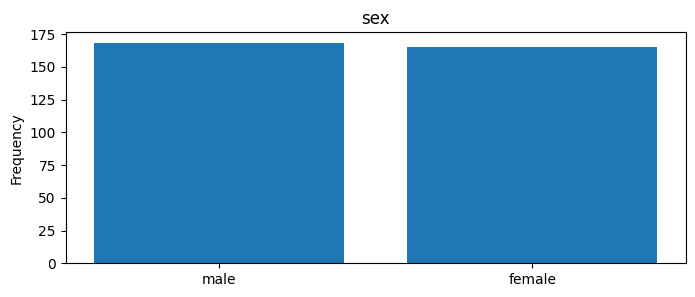

sex: 
sex
male      168
female    165
Name: count, dtype: int64


In [66]:
category1=['sex']
for c in category1:
    bar_plot(c)

## Các biến tính số

In [67]:
def plot_hist(variable):
    plt.figure(figsize=(8,3))
    plt.hist(DATA[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribituon with hist".format(variable))
    plt.show()

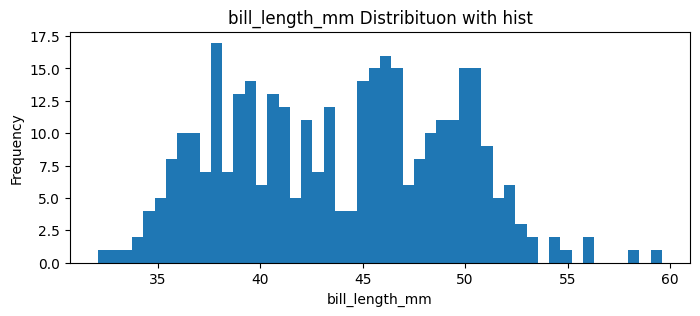

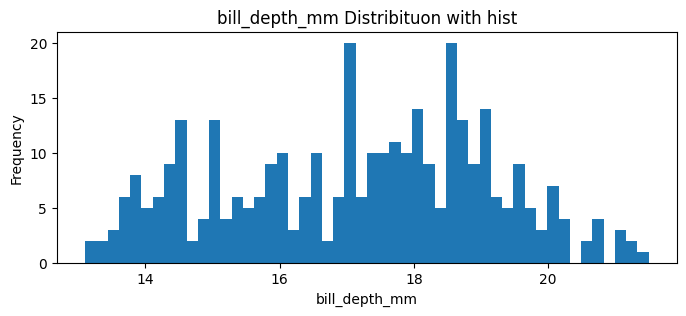

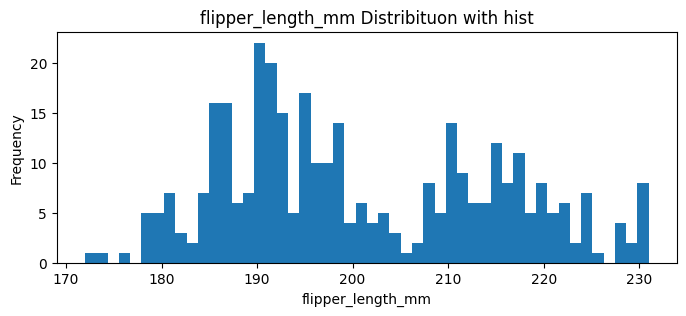

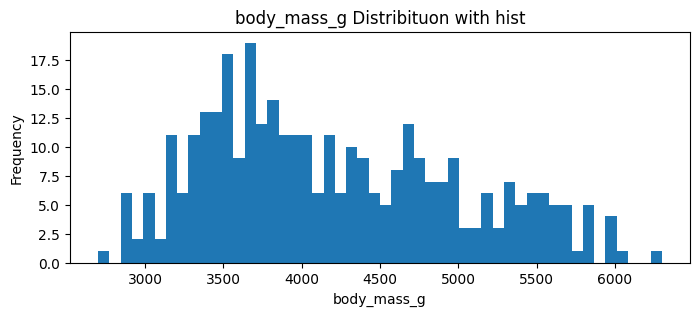

In [68]:
numericVar=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for n in numericVar:
    plot_hist(n)

# PHÂN TÍCH DỮ LIỆU CƠ BẢN: Tỷ lệ các loài chim theo giới tính

Phân tích tỷ lệ phần trăm các loài chim cánh cụt trong từng nhóm giới tính (`sex`).

In [69]:
DATA[['species']]

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Chinstrap
340,Chinstrap
341,Chinstrap
342,Chinstrap


In [70]:
ratio = (
    DATA.groupby("sex")["species"]
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)
print(ratio)


species     Adelie  Chinstrap     Gentoo
sex                                     
female   44.242424  20.606061  35.151515
male     43.452381  20.238095  36.309524


# TRAIN SPLIT TEST

In [71]:
DATA.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year'], inplace=True)

DATA = pd.get_dummies(DATA, columns=['sex'], drop_first=True)
DATA

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007,True
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,2009,True
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,2009,False
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,2009,True
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,2009,True


Chia dữ liệu thành các tập:
- `feature_train`: tập dữ liệu huấn luyện (X_train)
- `label_train`: nhãn tương ứng với tập huấn luyện (y_train)
- `feature_test`: tập dữ liệu kiểm tra (X_test)
- `label_test`: nhãn tương ứng với tập kiểm tra (y_test)

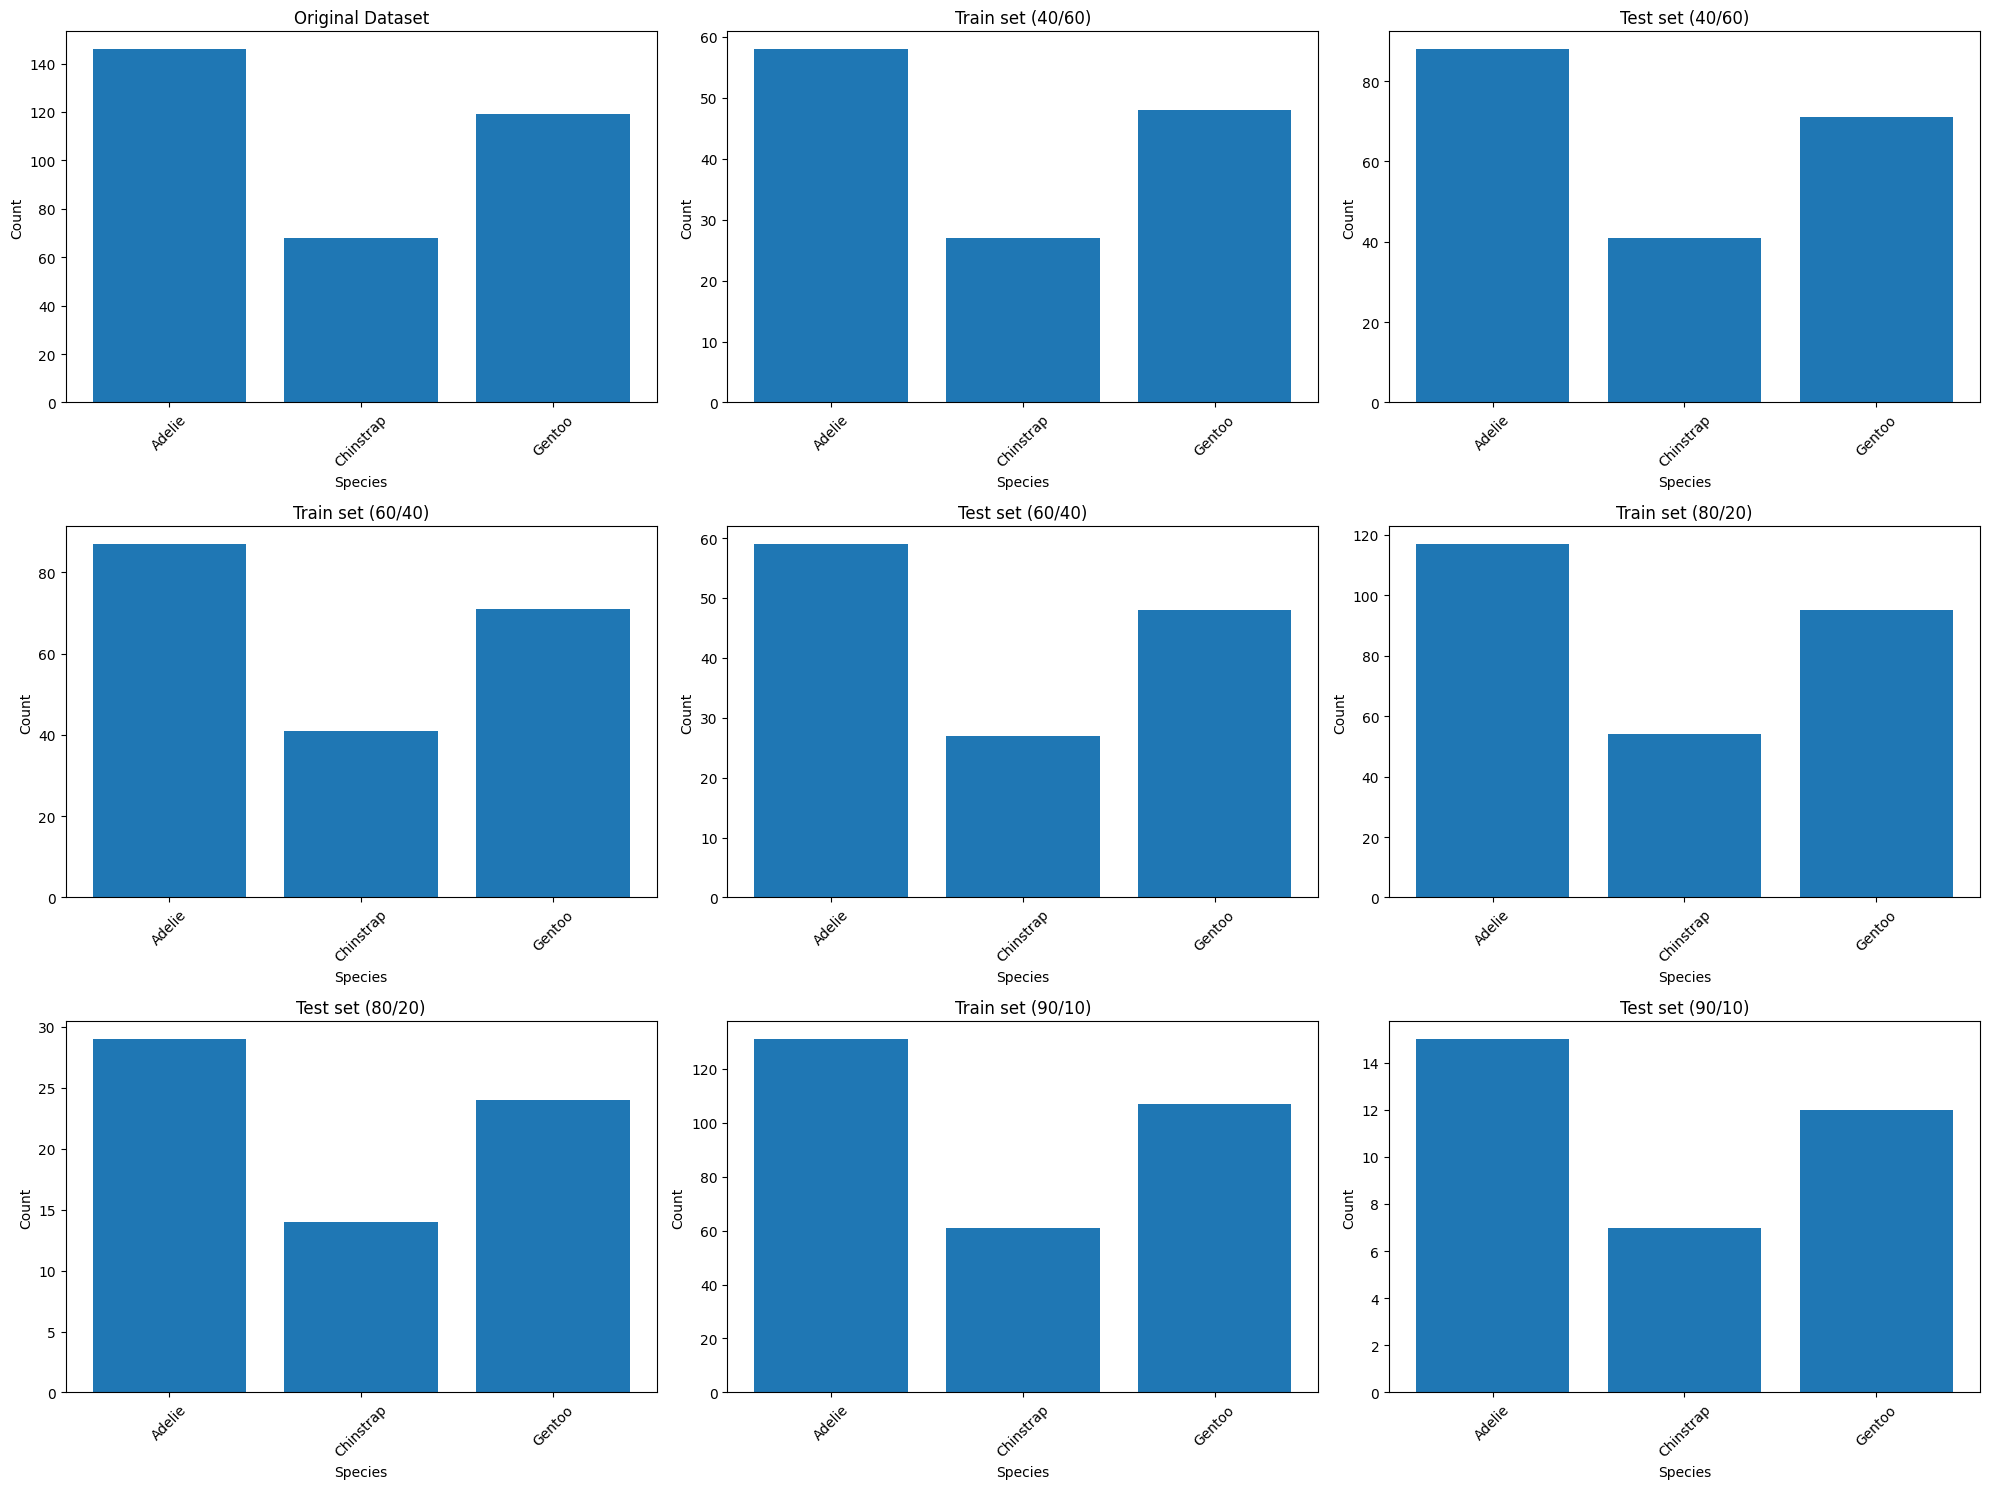

In [72]:
# Tạo FEATURES và LABELS
FEATURES = pd.get_dummies(DATA.drop(columns=["species", "island", "year"]), drop_first=True)
LABELS = DATA["species"]

# Chia dữ liệu train-test với các tỷ lệ khác nhau
splits = [0.6, 0.4, 0.2, 0.1]
split_results = [train_test_split(FEATURES, LABELS, test_size=s, random_state=42, stratify=LABELS) for s in splits]
labels_train1, labels_test1 = split_results[0][2], split_results[0][3]
labels_train2, labels_test2 = split_results[1][2], split_results[1][3]
labels_train3, labels_test3 = split_results[2][2], split_results[2][3]
labels_train4, labels_test4 = split_results[3][2], split_results[3][3]

sets = [
    (LABELS, "Original Dataset"),
    (labels_train1, "Train set (40/60)"), (labels_test1, "Test set (40/60)"),
    (labels_train2, "Train set (60/40)"), (labels_test2, "Test set (60/40)"),
    (labels_train3, "Train set (80/20)"), (labels_test3, "Test set (80/20)"),
    (labels_train4, "Train set (90/10)"), (labels_test4, "Test set (90/10)")
]

plt.figure(figsize=(20, 15))
for i, (labels, title) in enumerate(sets, 1):
    plt.subplot(3, 3, i)
    value_counts = labels.value_counts().sort_index()
    plt.bar(value_counts.index, value_counts)
    plt.title(title)
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Nhận xét về phân bố các lớp trong các tập dữ liệu Penguins

Biểu đồ cột thể hiện số lượng mẫu của từng loài chim cánh cụt (Adelie, Chinstrap, Gentoo) trong tập dữ liệu gốc cũng như các tập train và test với các tỷ lệ chia khác nhau (40/60, 60/40, 80/20, 90/10).

**Các điểm nổi bật:**

- **Phân bố lớp được giữ nguyên:**  
  Ở tất cả các tập train và test, tỷ lệ giữa ba lớp luôn được duy trì gần như giống với tập dữ liệu gốc. Điều này chứng tỏ quá trình chia tách dữ liệu đã sử dụng tham số `stratify`, đảm bảo mỗi lớp đều được đại diện đầy đủ trong từng tập con.

- **Không xuất hiện mất cân bằng mới:**  
  Dù số lượng mẫu thay đổi theo từng tỷ lệ chia, không có lớp nào bị giảm quá nhiều hoặc bị loại bỏ khỏi bất kỳ tập nào. Điều này giúp mô hình học máy không bị thiên lệch về một lớp cụ thể.

- **Ý nghĩa thực tiễn:**  
  Việc giữ nguyên phân bố lớp giữa các tập là rất quan trọng để đảm bảo mô hình được huấn luyện và đánh giá công bằng, phản ánh đúng hiệu suất thực tế khi áp dụng vào dữ liệu mới.

**Kết luận:**  
Việc chuẩn bị và chia tách dữ liệu đã được thực hiện đúng cách. Các tập train/test ở mọi tỷ lệ đều giữ được phân bố lớp giống với tập dữ liệu gốc, đảm bảo tính đại diện và công bằng cho quá trình huấn luyện và đánh

# 4. HUẤN LUYỆN MÔ HÌNH CÂY QUYẾT ĐỊNH

- Sử dụng DecisionTreeClassifier với tiêu chí entropy (information gain).
- Huấn luyện trên từng tập train đã chia.

Trong phần này, bốn mô hình **Decision Tree Classifier** được huấn luyện với cùng tham số nhưng trên các tập dữ liệu huấn luyện khác nhau.

### Tham số sử dụng cho cả 4 mô hình:
- `criterion="entropy"`: Dùng entropy để tính độ lợi thông tin khi chia nhánh.
- `max_depth=3`: Giới hạn độ sâu của cây là 3 để tránh overfitting.
- `random_state=42`: Đảm bảo tính tái lập kết quả.

### Mô hình 1:


In [73]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state= 42)
clf.fit(features_train1, labels_train1)

ValueError: Number of labels=133 does not match number of samples=137

Mô hình 2:

In [ ]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state= 42)
clf2.fit(features_train2, labels_train2)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Mô hình 3:

In [ ]:
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state= 42)
clf3.fit(features_train3, labels_train3)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Mô hình 4:

In [ ]:
clf4 = DecisionTreeClassifier(criterion="entropy" , max_depth=3, random_state= 42)
clf4.fit(features_train4, labels_train4)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# 5. Trực quan hóa cây quyết định
Sử dụng Graphviz để trực quan hóa cấu trúc cây quyết định cho từng mô hình.

In [ ]:
for clf, features_train, title in [
    (clf, features_train1, "Decision Tree - Train 1 (40/60)"),
    (clf2, features_train2, "Decision Tree - Train 2 (60/40)"),
    (clf3, features_train3, "Decision Tree - Train 3 (80/20)"),
    (clf4, features_train4, "Decision Tree - Train 4 (90/10)"),
]:
    plt.figure(figsize=(20, 10))
    plot_tree(
        clf,
        feature_names=features_train.columns,
        class_names=['Adelie', 'Gentoo', 'Chinstrap'],
        filled=True,
        rounded=True,
        fontsize=12
    )
    plt.title(title, fontsize=20)
    plt.show()

# 6. Đánh giá cây quyết định

Đánh giá hiệu suất từng mô hình trên tập kiểm tra bằng confusion_matrix và classification_report. Giải thích ý nghĩa các chỉ số và nhận xét về hiệu suất mô hình.


=== Đánh giá Decision Tree (Test set 40/60) ===
Confusion Matrix:


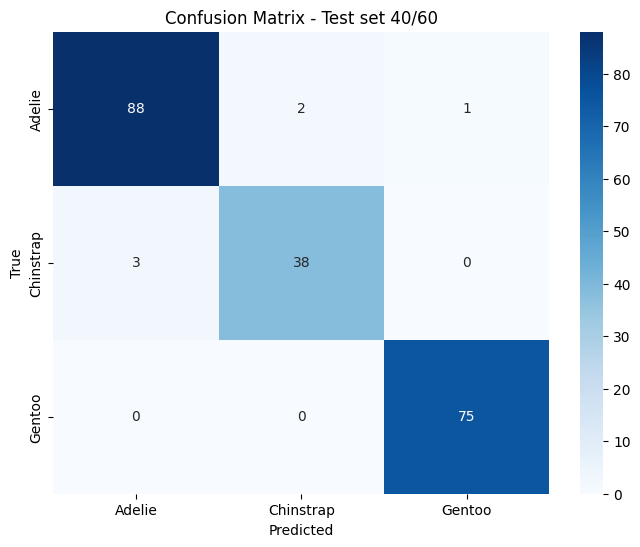

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        91
   Chinstrap       0.95      0.93      0.94        41
      Gentoo       0.99      1.00      0.99        75

    accuracy                           0.97       207
   macro avg       0.97      0.96      0.97       207
weighted avg       0.97      0.97      0.97       207

Accuracy: 0.9710

=== Đánh giá Decision Tree (Test set 60/40) ===
Confusion Matrix:


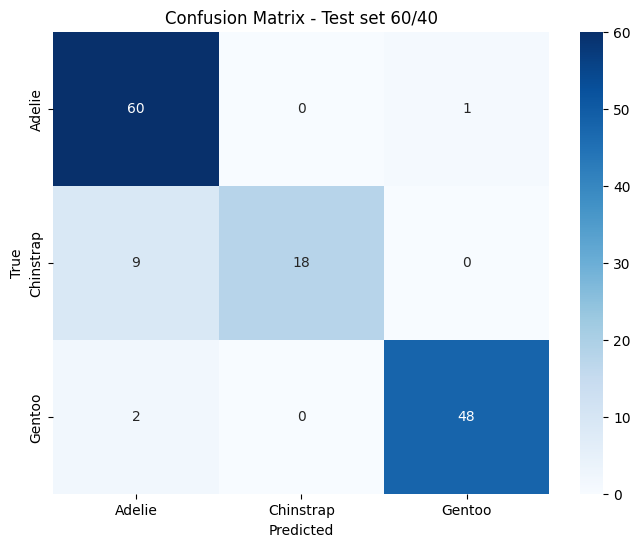

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.85      0.98      0.91        61
   Chinstrap       1.00      0.67      0.80        27
      Gentoo       0.98      0.96      0.97        50

    accuracy                           0.91       138
   macro avg       0.94      0.87      0.89       138
weighted avg       0.92      0.91      0.91       138

Accuracy: 0.9130

=== Đánh giá Decision Tree (Test set 80/20) ===
Confusion Matrix:


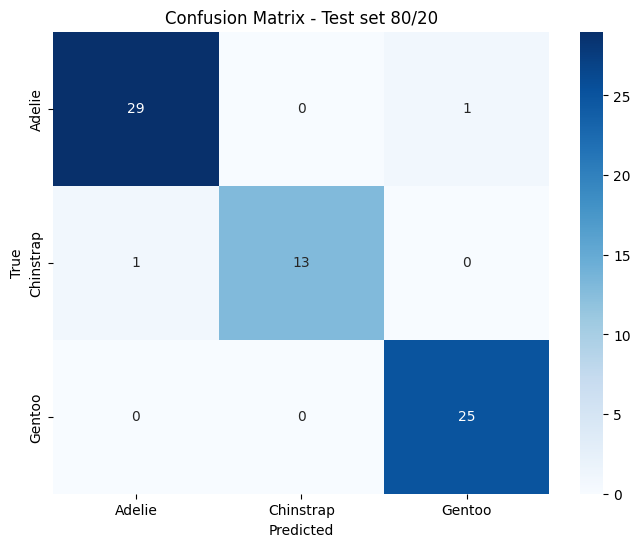

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        30
   Chinstrap       1.00      0.93      0.96        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.97        69
   macro avg       0.98      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

Accuracy: 0.9710

=== Đánh giá Decision Tree (Test set 90/10) ===
Confusion Matrix:


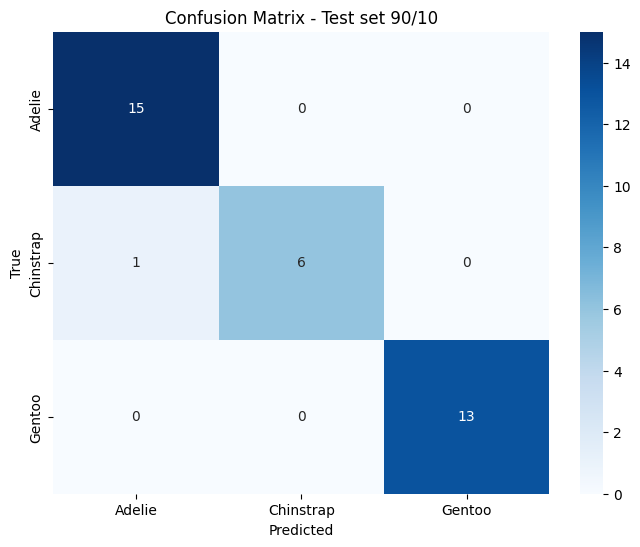

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        15
   Chinstrap       1.00      0.86      0.92         7
      Gentoo       1.00      1.00      1.00        13

    accuracy                           0.97        35
   macro avg       0.98      0.95      0.96        35
weighted avg       0.97      0.97      0.97        35

Accuracy: 0.9714


In [ ]:
test_sets = [
    (clf, features_test1, labels_test1, "40/60"),
    (clf2, features_test2, labels_test2, "60/40"),
    (clf3, features_test3, labels_test3, "80/20"),
    (clf4, features_test4, labels_test4, "90/10"),
]

for clf, X_test, y_test, ratio in test_sets:
    y_pred = clf.predict(X_test)
    print(f"\n=== Đánh giá Decision Tree (Test set {ratio}) ===")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=['Adelie', 'Chinstrap', 'Gentoo'])
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
                yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Test set {ratio}')
    plt.show()
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo']))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

### Diễn giải Confusion Matrix và Classification Report

**1. Ý nghĩa các chỉ số:**
- **Confusion Matrix (Ma trận nhầm lẫn):** Cho biết số lượng mẫu của từng lớp thực tế được dự đoán đúng hoặc nhầm sang các lớp khác. Số lớn nhất trên đường chéo chính là số lượng dự đoán đúng cho từng lớp.
- **Precision:** Tỷ lệ dự đoán đúng trên tổng số dự đoán cho mỗi lớp.
- **Recall:** Tỷ lệ dự đoán đúng trên tổng số mẫu thực tế của mỗi lớp.
- **F1-score:** Trung bình điều hòa giữa precision và recall, phản ánh sự cân bằng giữa hai chỉ số này.
- **Accuracy:** Tỷ lệ tổng thể các dự đoán đúng trên toàn bộ tập kiểm tra.

**2. Nhận xét hiệu suất mô hình:**

- Tất cả các mô hình đều đạt accuracy rất cao (từ 91% đến 97%), cho thấy Decision Tree phân loại tốt các loài chim cánh cụt trên các tập kiểm tra với các tỷ lệ chia khác nhau.

- **Lớp Adelie và Gentoo:**  
Precision, recall và f1-score của hai lớp này luôn ở mức rất cao (đa số trên 0.95), chứng tỏ mô hình nhận diện tốt và rất ít nhầm lẫn hai lớp này.

- **Lớp Chinstrap:**  
  Precision của lớp này thường cao (nhiều lần đạt 1.00), nhưng recall có thể thấp hơn (ví dụ, recall = 0.67 ở test set 60/40), nghĩa là mô hình dự đoán đúng khi đã nhận diện là Chinstrap, nhưng vẫn bỏ sót một số mẫu thực tế thuộc lớp này.

- **Macro avg và weighted avg:**  
  Các chỉ số trung bình đều cao, cho thấy mô hình cân bằng tốt giữa các lớp, không bị thiên lệch mạnh về bất kỳ lớp nào.

**3. Kết luận:**
- Mô hình Decision Tree với max_depth=3 hoạt động rất hiệu quả trên bộ dữ liệu Penguins, đặc biệt với hai lớp Adelie và Gentoo.
- Lớp Chinstrap có thể bị bỏ sót một số mẫu, nhất là khi tỷ lệ train/test thay đổi, nhưng nhìn chung vẫn được nhận diện tốt.
- Độ chính xác cao và các chỉ số f1-score đồng đều chứng tỏ mô hình phù hợp để áp dụng thực tế cho bài toán phân loại loài chim cánh cụt.

# Các chỉ số đánh giá mô hình

#### Tính toán tỷ lệ dự đoán sai

Sau khi mô hình dự đoán nhãn cho tập kiểm tra, ta tiến hành đánh giá độ chính xác tổng thể và tính tỷ lệ các mẫu bị phân loại sai. Thông qua đó, ta có thể hiểu rõ hơn về mức độ sai lệch của mô hình và liệu nó có đáng tin cậy trong thực tế hay không.


# 7. PHÂN TÍCH ẢNH HƯỞNG ĐỘ SÂU CỦA CÂY

- Sử dụng tập chia 80/20.
- Thử nghiệm các giá trị max_depth khác nhau.
- Trực quan hóa cây và so sánh độ chính xác.

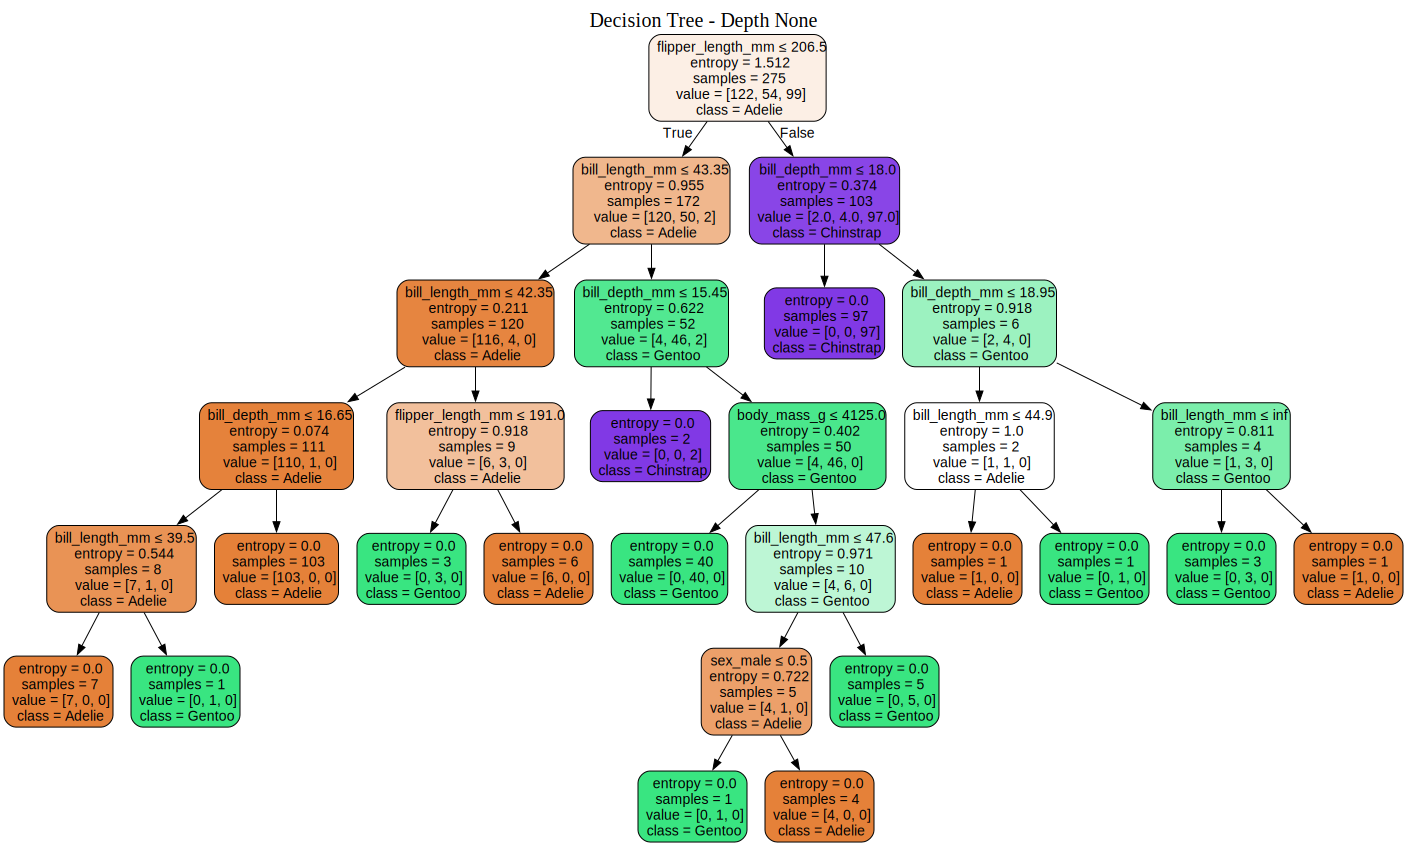

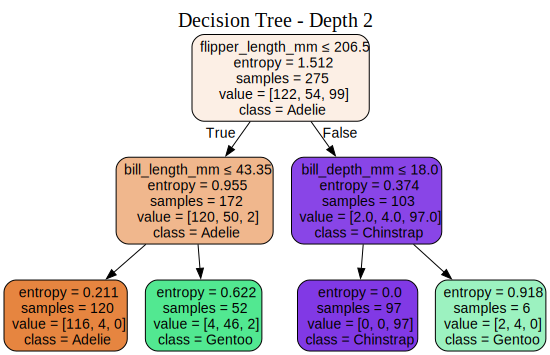

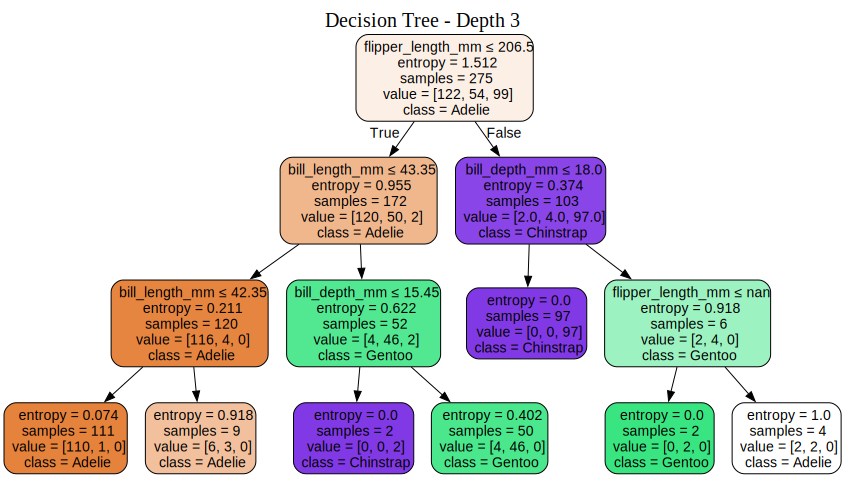

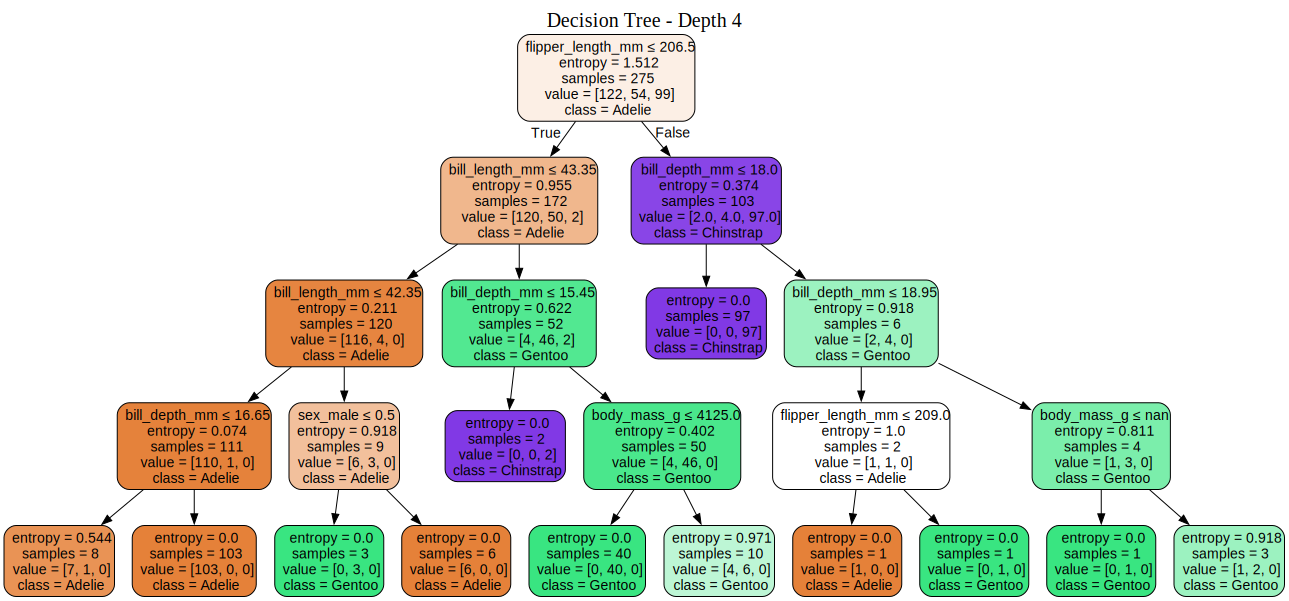

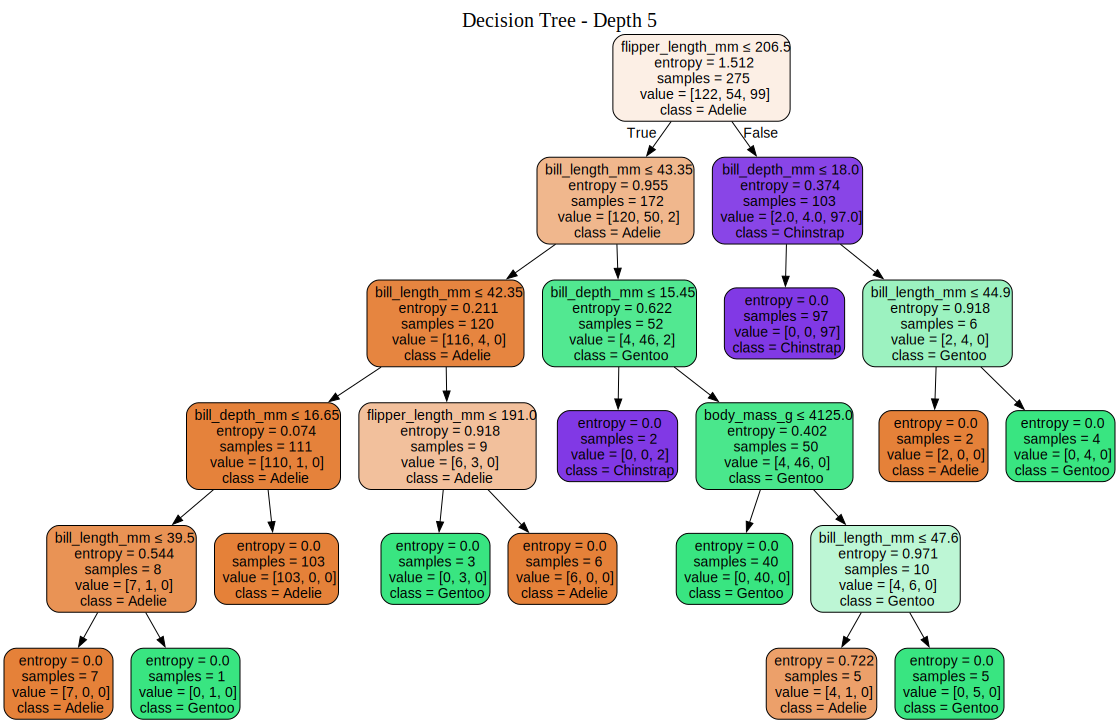

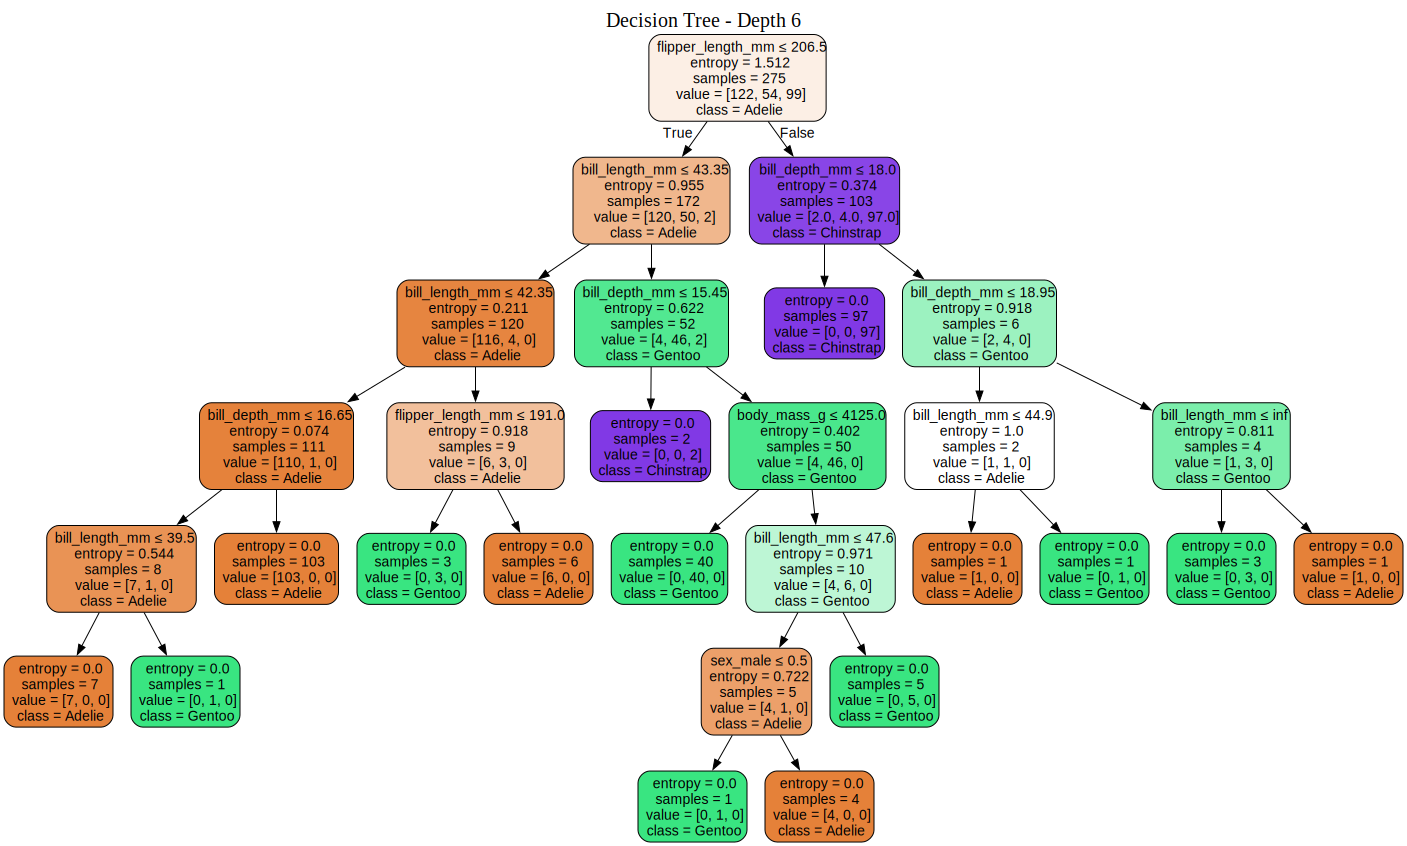

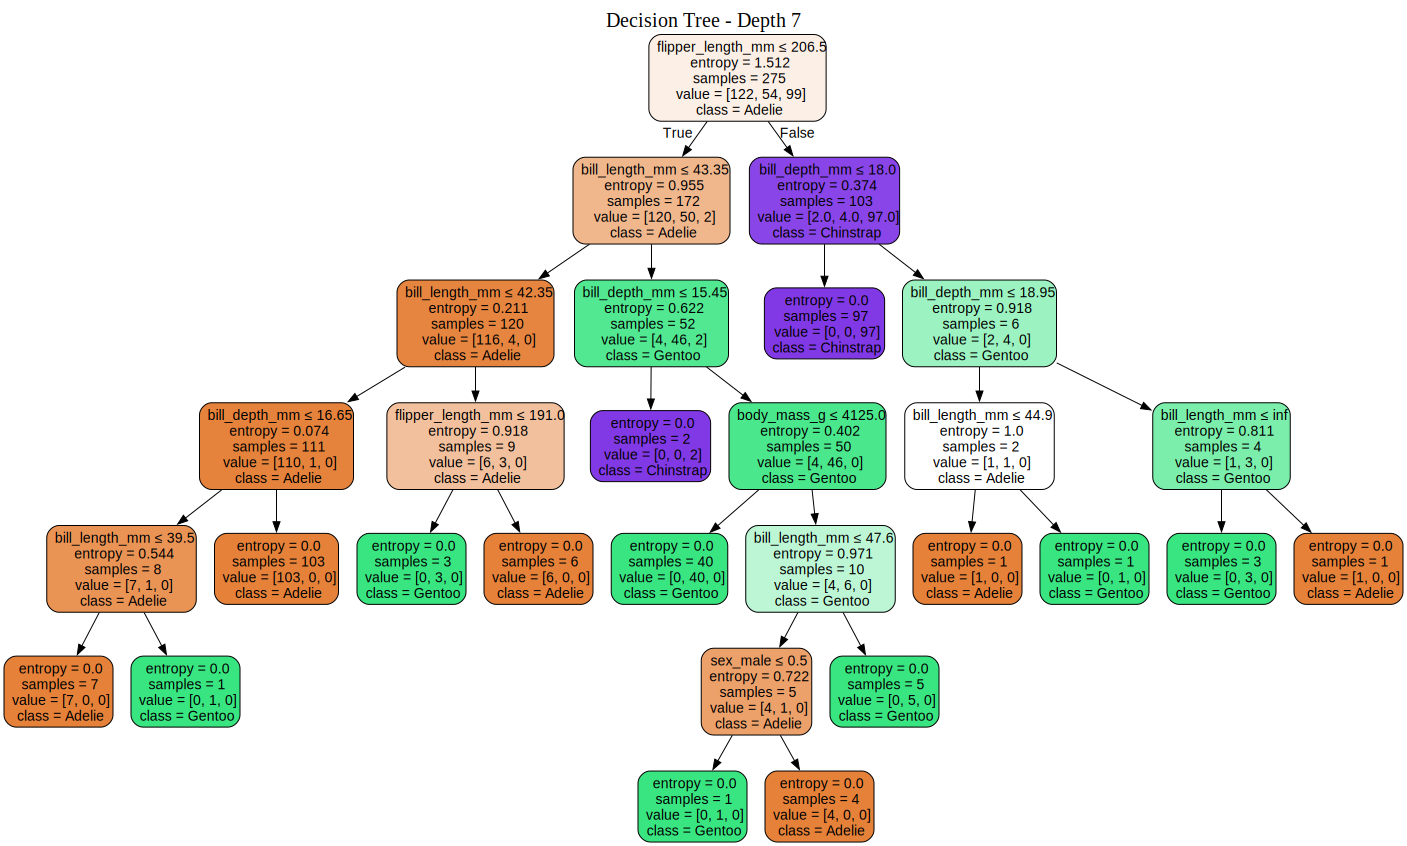

Max Depth | Test Accuracy
-------------------------
     None | 0.9855
        2 | 0.9710
        3 | 0.9710
        4 | 0.9855
        5 | 0.9855
        6 | 0.9855
        7 | 0.9855


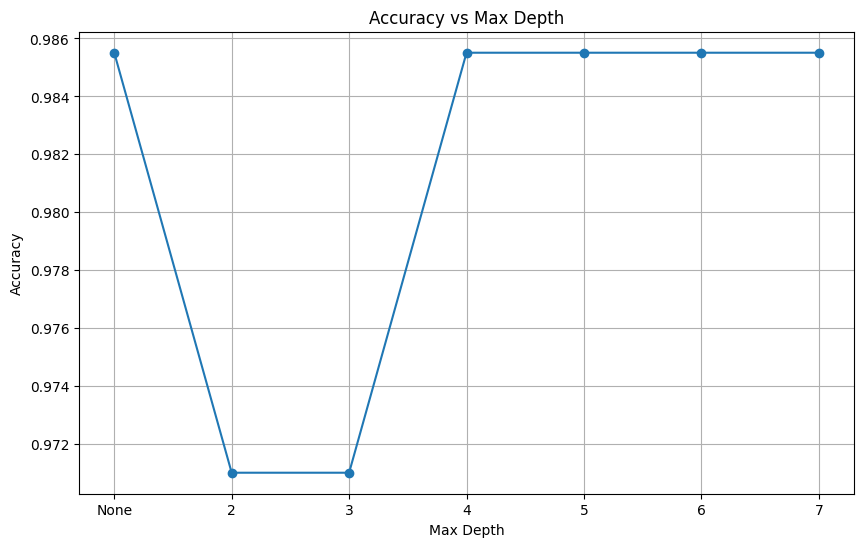

In [ ]:
max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = {}

for depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    clf.fit(features_train3, labels_train3)
    y_pred = clf.predict(features_test3)
    acc = accuracy_score(labels_test3, y_pred)
    accuracy_results[depth] = acc

    dot_data = export_graphviz(
        clf,
        feature_names=features_train3.columns,
        class_names=['Adelie', 'Gentoo', 'Chinstrap'],
        filled=True,
        rounded=True,
        special_characters=True
    )
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Depth {depth}"; labelloc=top; fontsize=20;'
    )
    graph = graphviz.Source(dot_data)
    display(graph)

print("Max Depth | Test Accuracy")
print("-------------------------")
for depth, acc in accuracy_results.items():
    depth_str = "None" if depth is None else str(depth)
    print(f"{depth_str:>9} | {acc:.4f}")

max_depth_values_plot = [1 if d is None else d for d in max_depth_values]

plt.figure(figsize=(10,6))
plt.plot(max_depth_values_plot, list(accuracy_results.values()), marker='o')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values_plot, labels=['None', 2, 3, 4, 5, 6, 7])
plt.grid()
plt.show()

### Nhận xét

Kết quả cho thấy độ chính xác trên tập kiểm tra đạt mức cao nhất (95.52%) khi `max_depth` là **None**, **4**, **5**, **6** và **7**. Điều này cho thấy rằng:

- Khi độ sâu quá nhỏ (2 hoặc 3), mô hình chưa đủ khả năng biểu diễn tốt dữ liệu → **underfitting**, accuracy chỉ đạt 94.03%.
- Từ độ sâu 4 trở lên, mô hình học tốt hơn và duy trì độ chính xác ổn định.
- Tuy nhiên, việc tăng độ sâu trên 4 không cải thiện thêm accuracy → chỉ làm mô hình **phức tạp hơn không cần thiết**.

**Kết luận:**  
**max_depth = 4 hoặc 5** là lựa chọn hợp lý nhất, giúp mô hình đạt hiệu suất cao trong khi vẫn duy trì được tính đơn giản và dễ diễn giải.
